In [188]:
import numpy as np

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler

from qiskit_aer import AerSimulator
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate

ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

ket0 / 2 + ket1 / 2

array([0.5, 0.5])

In [189]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])

display(M1 / 2 + M2 / 2)
display(np.matmul(M1, ket1))
display(np.matmul(M1, M2))
display(np.matmul(M2, M1))

array([[1. , 1. ],
       [0.5, 0. ]])

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [190]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")
display(u)

State vectors u, v, and w have been defined.
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [191]:
display(u.draw("latex"))
display(v.draw("text"))
display(v.draw("latex"))

display(u.is_valid())
display(w.is_valid())

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

True

False

In [192]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 556, '1': 444}

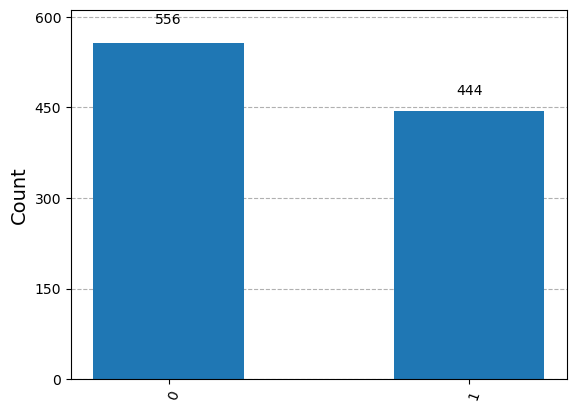

In [193]:
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [194]:
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [195]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [196]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

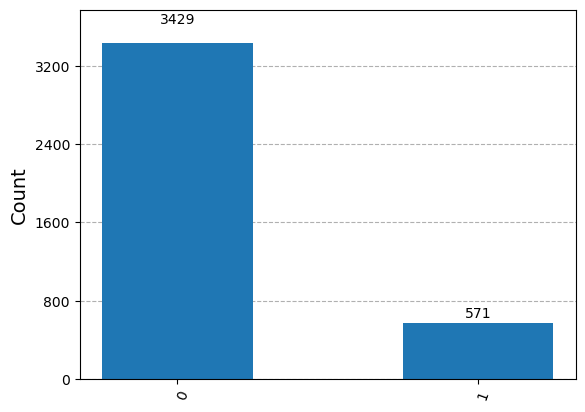

In [197]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

In [198]:
zero, one = Statevector.from_label("0"), Statevector.from_label("1")
display(zero)
display(one)
zero.tensor(one).draw("latex")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

In [199]:
plus = Statevector.from_label("+")
display(plus)
i_state = Statevector([1 / np.sqrt(2), 1j / np.sqrt(2)])
psi = plus.tensor(i_state)

psi.draw("latex")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

In [200]:
X = Operator([[0, 1], [1, 0]])
I = Operator([[1, 0], [0, 1]])

X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [201]:
psi.evolve(I ^ X).draw("latex")

<IPython.core.display.Latex object>

In [202]:
CX = Operator(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
    ]
)

psi.evolve(CX).draw("latex")

<IPython.core.display.Latex object>

In [203]:
W = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / np.sqrt(3))
display(W)
W.draw("latex")

Statevector([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j,
             0.        +0.j, 0.57735027+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In [204]:
result, new_sv = W.measure([0])  # measure qubit 0
print(f"Measured: {result}\nState after measurement:")
new_sv.draw("latex")

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

In [205]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [206]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [207]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw())

┌───┐     ┌─┐   
  Y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  X: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
B: 1/═══════════╩══╬═
                0  ║ 
A: 1/══════════════╩═
                   0

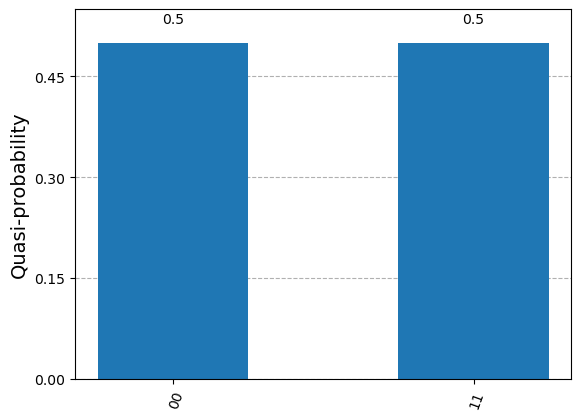

In [208]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

In [209]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw())

░      ┌───┐ ░    ┌─┐ ░                                     »
  Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [210]:
random_gate = UGate(
    theta=np.random.random() * 2 * np.pi,
    phi=np.random.random() * 2 * np.pi,
    lam=np.random.random() * 2 * np.pi,
)

display(random_gate.to_matrix())

array([[ 0.81473664+0.j        , -0.51254256-0.27111683j],
       [-0.40463925+0.41529663j, -0.77544106+0.24997389j]])

In [211]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())

┌─────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░ »
       Q: ┤ U(1.237,2.3432,0.48655) ├─░────────────░───■──┤ H ├─░────┤M├─░─»
          └─────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░ »
       A: ────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─»
                                      ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ »
       B: ────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                      ░      └───┘ ░            ░  ║  ║  ░ »
     a: 1/═════════════════════════════════════════════════════════╩══╬════»
                                                                   0  ║    »
     b: 1/════════════════════════════════════════════════════════════╩════»
                                                                      0    »
Result: 1/═════════════════════════════════════════════════════════════════»
                                                                           »
«                                                         ░ »
«       Q: ───────────────────────────────────────────────░─»
«                                                         ░ »
«       A: ───────────────────────────────────────────────░─»
«          ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«          └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«          ┌──╨──┐                   ║                      »
«     a: 1/╡ 0x1 ╞═══════════════════╬══════════════════════»
«          └─────┘                ┌──╨──┐                   »
«     b: 1/═══════════════════════╡ 0x1 ╞═══════════════════»
«                                 └─────┘                   »
«Result: 1/═════════════════════════════════════════════════»
«                                                           »
«                                           
«       Q: ─────────────────────────────────
«                                           
«       A: ─────────────────────────────────
«          ┌────────────────────────────┐┌─┐
«       B: ┤ U(-1.237,-0.48655,-2.3432) ├┤M├
«          └────────────────────────────┘└╥┘
«     a: 1/═══════════════════════════════╬═
«                                         ║ 
«     b: 1/═══════════════════════════════╬═
«                                         ║ 
«Result: 1/═══════════════════════════════╩═
«                                         0

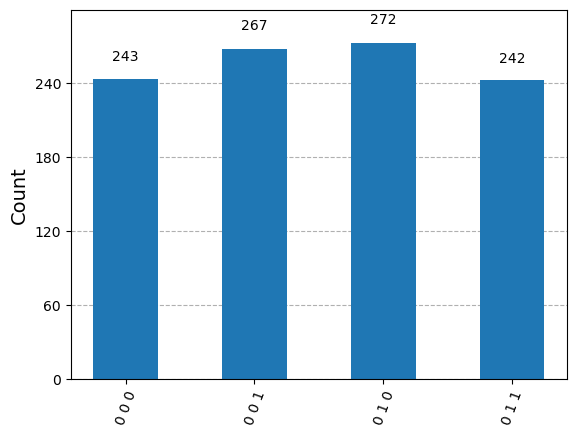

In [212]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

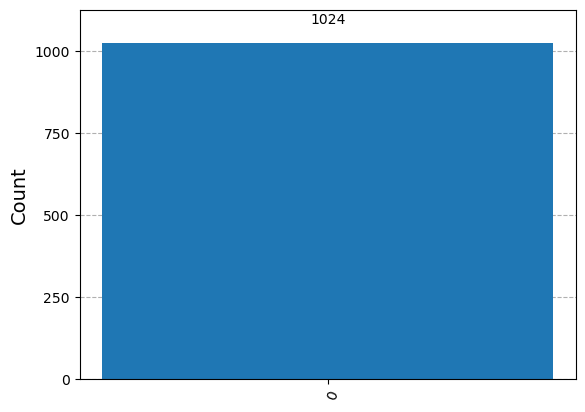

In [213]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

In [214]:
c = "1"
d = "0"

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw())

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Measured 10 with frequency 0.9999999999999996


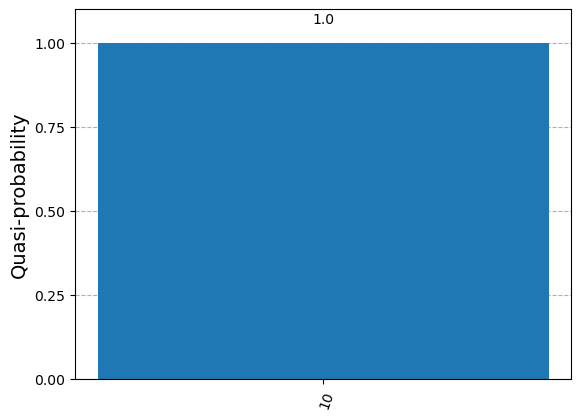

In [215]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

In [216]:
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'randomizer' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw())

░ ┌───┐┌─┐┌───┐┌─┐ ░                                »
randomizer: ───────────░─┤ H ├┤M├┤ H ├┤M├─░────────────────────────────────»
            ┌───┐      ░ └───┘└╥┘└───┘└╥┘ ░ ┌────── ┌───┐ ───────┐ ┌────── »
         A: ┤ H ├──■───░───────╫───────╫──░─┤ If-0  ┤ Z ├  End-0 ├─┤ If-0  »
            └───┘┌─┴─┐ ░       ║       ║  ░ └──╥─── └───┘ ───────┘ └──╥─── »
         B: ─────┤ X ├─░───────╫───────╫──░────╫──────────────────────╫────»
                 └───┘ ░       ║       ║  ░ ┌──╨──┐                   ║    »
 Alice d: 1/═══════════════════╬═══════╩════╡ 0x1 ╞═══════════════════╬════»
                               ║       0    └─────┘                ┌──╨──┐ »
 Alice c: 1/═══════════════════╩═══════════════════════════════════╡ 0x1 ╞═»
                               0                                   └─────┘ »
   Bob d: 1/═══════════════════════════════════════════════════════════════»
                                                                           »
   Bob c: 1/═══════════════════════════════════════════════════════════════»
                                                                           »
«                            ░            ░       
«randomizer: ────────────────░────────────░───────
«            ┌───┐ ───────┐  ░      ┌───┐ ░ ┌─┐   
«         A: ┤ X ├  End-0 ├──░───■──┤ H ├─░─┤M├───
«            └───┘ ───────┘  ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
«         B: ────────────────░─┤ X ├──────░──╫─┤M├
«                            ░ └───┘      ░  ║ └╥┘
« Alice d: 1/════════════════════════════════╬══╬═
«                                            ║  ║ 
« Alice c: 1/════════════════════════════════╬══╬═
«                                            ║  ║ 
«   Bob d: 1/════════════════════════════════╩══╬═
«                                            0  ║ 
«   Bob c: 1/═══════════════════════════════════╩═
«                                               0

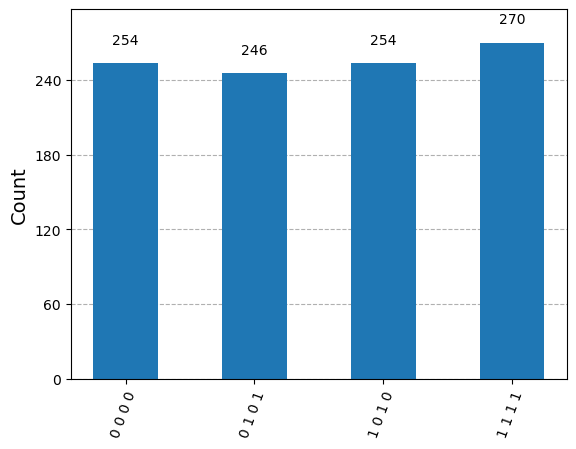

In [217]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [218]:
def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = np.random.randint(0, 2), np.random.randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

def chsh_circuit(x, y):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        QuantumCircuit: Circuit that, when run, returns Alice and Bob's
            answer bits.
    """
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-np.pi / 2, 0)
    qc.measure(0, 0)

    # Bob
    if y == 0:
        qc.ry(-np.pi / 4, 1)
    else:
        qc.ry(np.pi / 4, 1)
    qc.measure(1, 1)

    return qc

In [219]:
# Draw the four possible circuits

print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw())

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw())

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw())

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw())

(x,y) = (0,0)


┌───┐      ░  ┌───────┐  ┌─┐   
q_0: ┤ H ├──■───░──┤ Ry(0) ├──┤M├───
     └───┘┌─┴─┐ ░ ┌┴───────┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(-π/4) ├─╫─┤M├
          └───┘ ░ └──────────┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

(x,y) = (0,1)


┌───┐      ░  ┌───────┐ ┌─┐   
q_0: ┤ H ├──■───░──┤ Ry(0) ├─┤M├───
     └───┘┌─┴─┐ ░ ┌┴───────┴┐└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(π/4) ├─╫─┤M├
          └───┘ ░ └─────────┘ ║ └╥┘
c: 2/═════════════════════════╩══╩═
                              0  1

(x,y) = (1,0)


┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     └───┘┌─┴─┐ ░ ├──────────┤└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(-π/4) ├─╫─┤M├
          └───┘ ░ └──────────┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

(x,y) = (1,1)


┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     └───┘┌─┴─┐ ░ ├─────────┬┘└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(π/4) ├──╫─┤M├
          └───┘ ░ └─────────┘  ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

In [220]:
sampler = Sampler()

def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # `shots=1` runs the circuit once
    result = sampler.run(chsh_circuit(x, y), shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.86


In [221]:
def classical_strategy(x, y):
    """An optimal classical strategy for the CHSH game
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.718
